Surf's Up Homework
: Harry Chapman

This file explores the climate in Hawaii (temperature and precipitation) using SQLAlchemy

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
measurementAll = """
                    SELECT
                        *
                    FROM
                        measurement
                    LIMIT 10
                """
engine.execute(measurementAll).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
stationAll = """
                    SELECT
                        *
                    FROM
                        station
                    LIMIT 10
                """
engine.execute(stationAll).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
dateQuery = """
            SELECT
                MAX(date)
            FROM
                measurement
            """
endDate = engine.execute(dateQuery).fetchall()[0][0]
endDate

'2017-08-23'

In [16]:
endDate = dt.datetime.fromisoformat(endDate).date()
startDate = endDate  - dt.timedelta(days=365)

print(endDate)
print(startDate)

2017-08-23
2016-08-23


In [17]:
precipQuery = f"""
                SELECT
                    date,
                    prcp
                FROM
                    measurement
                WHERE
                    date > '{startDate}'
                    AND date <= '{endDate}'
                """
engine.execute(precipQuery).fetchall()

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [18]:
conn = engine.connect()

In [19]:
df = pd.read_sql(precipQuery, conn)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [20]:
precipResults = engine.execute(precipQuery).fetchall()
df2 = pd.DataFrame(precipResults)
df2.columns = ["date", "prcp"]
df2.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


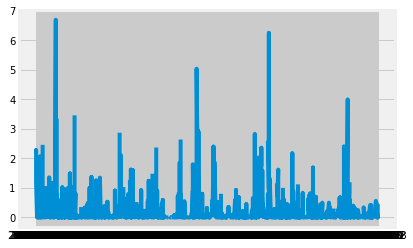

In [21]:
plt.plot(df.sort_values(by="date", ascending=True).date, df.sort_values(by="date", ascending=True).prcp)

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 2016-08-24 to 2017-08-23
Data columns (total 1 columns):
prcp    2015 non-null float64
dtypes: float64(1)
memory usage: 34.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2015 entries, 2016-08-24 to 2017-08-23
Data columns (total 1 columns):
prcp    2015 non-null float64
dtypes: float64(1)
memory usage: 31.5+ KB
None


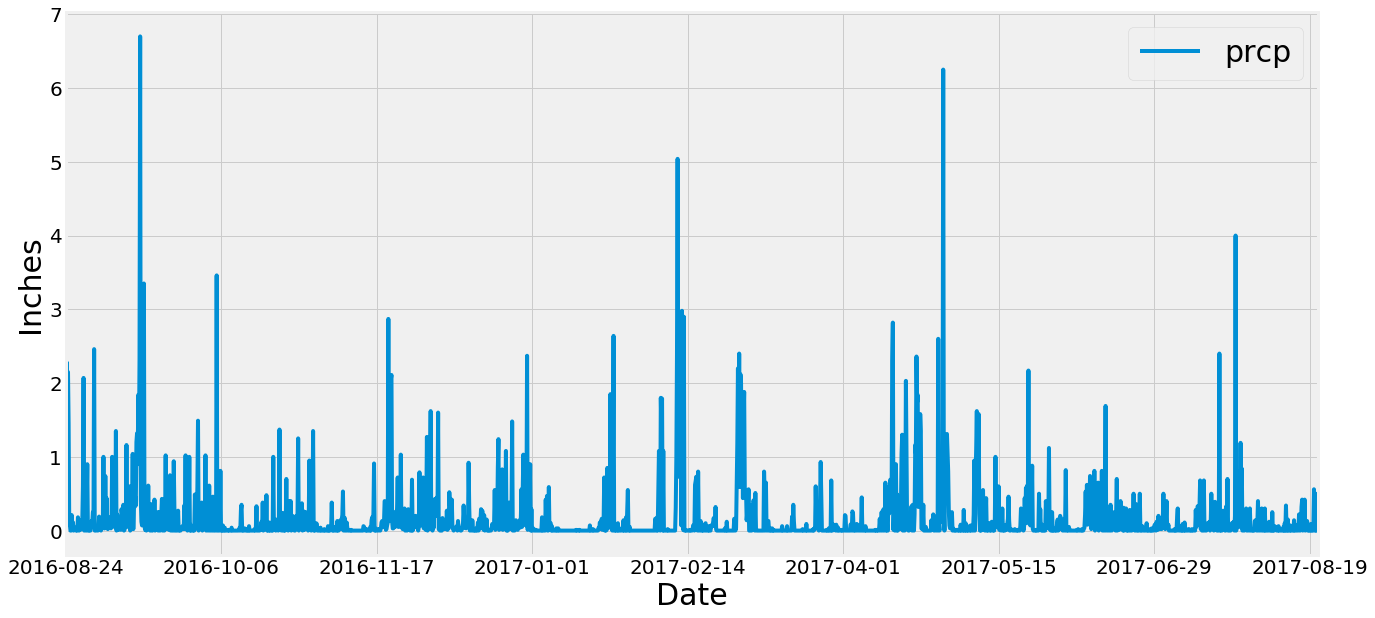

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find last date string
last_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())

# Convert date string to datetime object
last_date = dt.datetime.strptime((list(np.ravel(last_date))[0]), '%Y-%m-%d').date()

# Calculate the date 1 year ago from the last data point in the database
prior_year_date = (last_date - dt.timedelta(days=365))

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > prior_year_date)\
                        .order_by(Measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_scores)
precipitation_df = precipitation_df.set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_index(ascending = True)

# To compare after drop NaN
print(precipitation_df.info(verbose=True, null_counts=True))

# Drop NaN values
precipitation_df = precipitation_df.dropna(axis=0, how='any')
print(precipitation_df.info(verbose=True, null_counts=True))

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(20,10))
plt.xlabel('Date', size = 30)
plt.ylabel('Inches', size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size': 30})
plt.savefig('Images/precipitation.png')

![precipitation](Images/precipitation.png)

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [39]:
# Design a query to show how many stations are available in this dataset
number_of_stations = session.query(Station).count()
print(f"The number of stations in the dataset is {number_of_stations}")


The number of stations in the dataset is 9


In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# msoria05 method - Github
active_stations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)\
                  .order_by(func.count(Measurement.station).desc()).all())

print("The most active stations are:")
for station in active_stations:
    print(station)

The most active stations are:
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = active_stations[0][0]
station_name = (session.query(Station.name).filter_by(station = station_id))

# Lowest temp
#msoria05 structure - Github (basic session.query setup used throughout after lowest_temp help)
lowest_temp = (session.query(Measurement.tobs).filter(Measurement.station == station_id).order_by(Measurement.tobs.asc())\
               .first())

# Highest temp
highest_temp = (session.query(Measurement.tobs).filter(Measurement.station == station_id)\
               .order_by(Measurement.tobs.desc()).first())

# Average temp
avg_temp = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id))

# Print temp info
print(f'The most active station was {station_name[0][0]}')
print(f'The lowest temperature was {lowest_temp[0]} degrees Fahrenheit')
print(f'The highest temperature was {highest_temp[0]} degrees Fahrenheit')
print(f'The average temperature was {round(avg_temp[0][0],1)} degrees Fahrenheit')


The most active station was WAIHEE 837.5, HI US
The lowest temperature was 54.0 degrees Fahrenheit
The highest temperature was 85.0 degrees Fahrenheit
The average temperature was 71.7 degrees Fahrenheit


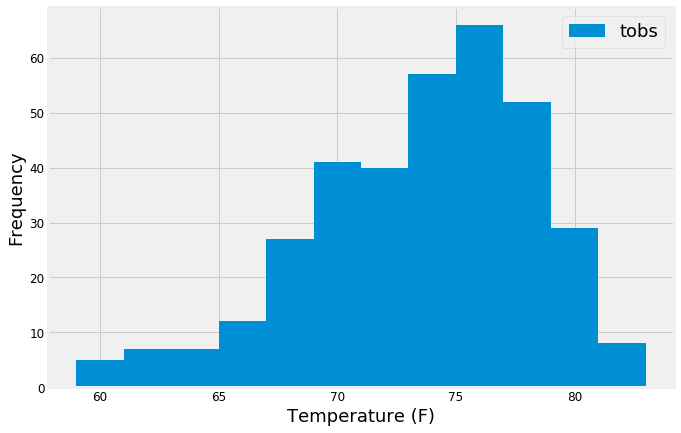

In [59]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = (session.query(Measurement.date, Measurement.tobs).filter(Measurement.date > prior_year_date)\
            .filter(Measurement.station == station_id).order_by(Measurement.tobs.asc()).all())

# Make temp data dataframe
temp_data_df = pd.DataFrame(temp_data)

# Drop NaN
temp_data_df = temp_data_df.dropna(axis=0, how = "any")

# Create histogram of the data
temp_data_df.plot(kind = 'hist', bins = 12, figsize = (10,7))
plt.xlabel('Temperature (F)', size = 18)
plt.ylabel('Frequency', size = 18)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.legend(prop={'size': 18})
plt.savefig('Images/Temperature.png')

![precipitation](Images/station-histogram.png)

In [48]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [60]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = prior_year_date
end_date = last_date
trip_temps = calc_temps(start_date, end_date)
min_temp = trip_temps[0][0]
max_temp = trip_temps[0][2]
avg_temp = trip_temps[0][1]

print("Trip temperature data:")
print(f"Start date: {start_date}")
print(f"End Date: {end_date}")
print(f"Minimum Temperature: {min_temp} degrees Fahrenheit")
print(f"Maximum Temperature: {max_temp} degrees Fahrenheit")
print(f"Average temperature: {round(avg_temp,1)} degrees Fahrenheit")

Trip temperature data:
Start date: 2016-08-23
End Date: 2017-08-23
Minimum Temperature: 58.0 degrees Fahrenheit
Maximum Temperature: 87.0 degrees Fahrenheit
Average temperature: 74.6 degrees Fahrenheit


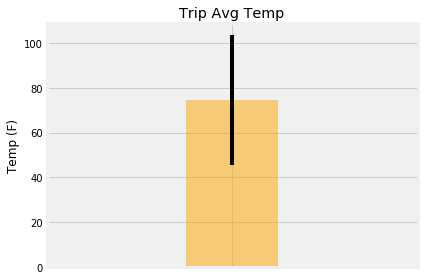

In [56]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#nblase22 plot setup - Github
objects = [str(end_date)]
x_axis = np.arange(len(objects))
fig, ax = plt.subplots()
temp_plt = ax.bar(x_axis, avg_temp, yerr = (max_temp - min_temp), color = 'orange', alpha = 0.5, width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [])
plt.xlim(-1, len(x_axis))
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.tight_layout()
plt.show()

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


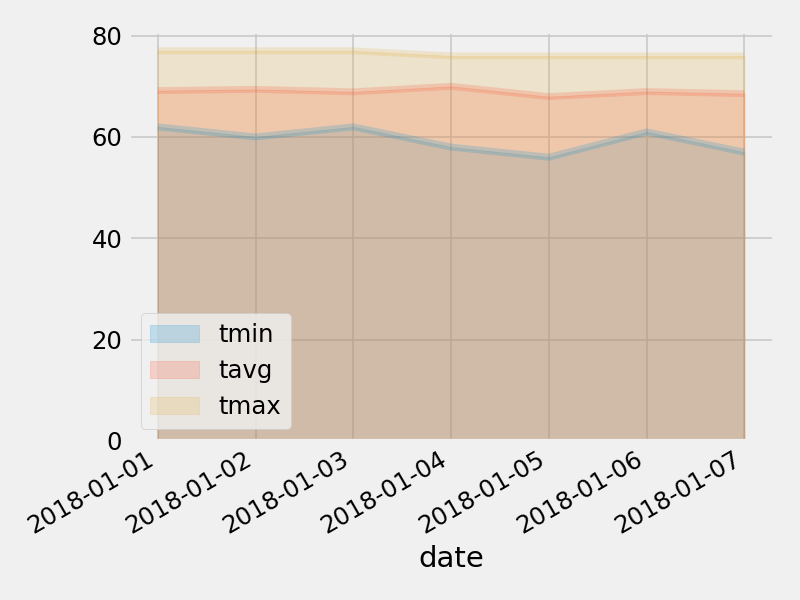

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
